<a href="https://colab.research.google.com/github/weasel-codes/anomaly-detection-iot/blob/main/anomaly_detection_preprocess2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import seaborn as sn
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [2]:
base_url = '/content/drive/MyDrive/ML/anomaly/'
data_file = 'dataset.csv'

In [3]:
df = pd.read_csv(base_url+data_file)
if df.shape[1] > 8 :
  df = df.drop(columns=df.columns[0])

df = df[:1000]

df

,frame.number,frame.time_relative,frame.len,data.len,ip.src,ip.dst,frame.protocols,label
0,88211,70.949809,1514,NaN,104.74.213.186,192.168.0.24,eth:ethertype:ip:tcp,0
1,58708,132.842376,54,NaN,192.168.0.19,173.194.49.203,eth:ethertype:ip:tcp,0
2,131894,296.013317,66,NaN,192.168.0.16,192.168.0.13,eth:ethertype:ip:tcp,0
3,252744,49.393385,74,32.0,192.168.0.24,210.89.164.90,eth:ethertype:ip:udp:data,1
4,35069,66.823389,1502,NaN,192.168.0.13,192.168.0.16,eth:ethertype:ip:tcp,0
...,...,...,...,...,...,...,...,...
995,4476,35.342568,1507,NaN,104.118.134.215,192.168.0.24,eth:ethertype:ip:tcp,0
996,94873,283.904117,1514,NaN,114.31.35.40,192.168.0.23,eth:ethertype:ip:tcp:ssl,0
997,116267,58.271800,74,32.0,192.168.0.13,210.89.164.90,eth:ethertype:ip:udp:data,1
998,254757,49.547688,74,32.0,192.168.0.24,210.89.164.90,eth:ethertype:ip:udp:data,1


In [4]:
df.isna().sum()

frame.number             0
frame.time_relative      0
frame.len                0
data.len               523
ip.src                   5
ip.dst                   5
frame.protocols          0
label                    0
dtype: int64

In [5]:
df['data.len'] = df['data.len'].fillna(0)
df['ip.src'] = df['ip.src'].fillna(method='ffill')
df['ip.dst'] = df['ip.dst'].fillna(method='ffill')
df.isna().sum()

frame.number           0
frame.time_relative    0
frame.len              0
data.len               0
ip.src                 0
ip.dst                 0
frame.protocols        0
label                  0
dtype: int64

In [6]:
df

,frame.number,frame.time_relative,frame.len,data.len,ip.src,ip.dst,frame.protocols,label
0,88211,70.949809,1514,0.0,104.74.213.186,192.168.0.24,eth:ethertype:ip:tcp,0
1,58708,132.842376,54,0.0,192.168.0.19,173.194.49.203,eth:ethertype:ip:tcp,0
2,131894,296.013317,66,0.0,192.168.0.16,192.168.0.13,eth:ethertype:ip:tcp,0
3,252744,49.393385,74,32.0,192.168.0.24,210.89.164.90,eth:ethertype:ip:udp:data,1
4,35069,66.823389,1502,0.0,192.168.0.13,192.168.0.16,eth:ethertype:ip:tcp,0
...,...,...,...,...,...,...,...,...
995,4476,35.342568,1507,0.0,104.118.134.215,192.168.0.24,eth:ethertype:ip:tcp,0
996,94873,283.904117,1514,0.0,114.31.35.40,192.168.0.23,eth:ethertype:ip:tcp:ssl,0
997,116267,58.271800,74,32.0,192.168.0.13,210.89.164.90,eth:ethertype:ip:udp:data,1
998,254757,49.547688,74,32.0,192.168.0.24,210.89.164.90,eth:ethertype:ip:udp:data,1


In [7]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['ip.src']= label_encoder.fit_transform(df['ip.src'])
df['ip.dst']= label_encoder.fit_transform(df['ip.dst'])
df[:5]

,frame.number,frame.time_relative,frame.len,data.len,ip.src,ip.dst,frame.protocols,label
0,88211,70.949809,1514,0.0,3,28,eth:ethertype:ip:tcp,0
1,58708,132.842376,54,0.0,36,20,eth:ethertype:ip:tcp,0
2,131894,296.013317,66,0.0,35,23,eth:ethertype:ip:tcp,0
3,252744,49.393385,74,32.0,38,31,eth:ethertype:ip:udp:data,1
4,35069,66.823389,1502,0.0,33,26,eth:ethertype:ip:tcp,0


In [8]:
# Create Entites using indexes of csv
X = df.iloc[:, :-1].values #All the rows + all the columns except last
Y = df.iloc[:,-1] #Dependent vairables is last column
X.shape, Y.shape

((1000, 7), (1000,))

In [9]:
for i in range(X.shape[0]):
  var = X[i][6].split(':')
  print(var)
  temp = ""
  if len(var) == 1 :
    temp = ""
  elif len(var) == 2 :
    temp = temp + var[0] + ":" + var[1]
  elif len(var) == 3 :
    temp = temp + var[0] + ":" + var[1] + ":" + var[2]
  else :
    temp = temp + var[0] + ":" + var[1] + ":" + var[2] + ":" + var[3]

  X[i][6] = temp
  print(i , " : ", X[i][6])

['eth', 'ethertype', 'ip', 'tcp']
0  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'tcp']
1  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'tcp']
2  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'udp', 'data']
3  :  eth:ethertype:ip:udp
['eth', 'ethertype', 'ip', 'tcp']
4  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'tcp']
5  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'udp', 'data']
6  :  eth:ethertype:ip:udp
['eth', 'ethertype', 'ip', 'udp', 'data']
7  :  eth:ethertype:ip:udp
['eth', 'ethertype', 'ip', 'tcp']
8  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'tcp']
9  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'tcp', 'ssl']
10  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'udp', 'data']
11  :  eth:ethertype:ip:udp
['eth', 'ethertype', 'ip', 'icmp', 'ip', 'tcp']
12  :  eth:ethertype:ip:icmp
['eth', 'ethertype', 'ip', 'tcp']
13  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'udp', 'data']
14  :  eth:ethertype:ip:udp
['eth', 'ethertype

In [10]:
df = pd.DataFrame(data=X)
df[6]= label_encoder.fit_transform(df[6])
df

,0,1,2,3,4,5,6
0,88211,70.9498,1514,0,3,28,2
1,58708,132.842,54,0,36,20,2
2,131894,296.013,66,0,35,23,2
3,252744,49.3934,74,32,38,31,3
4,35069,66.8234,1502,0,33,26,2
...,...,...,...,...,...,...,...
995,4476,35.3426,1507,0,1,28,2
996,94873,283.904,1514,0,17,27,2
997,116267,58.2718,74,32,33,31,3
998,254757,49.5477,74,32,38,31,3


In [11]:
X = df.iloc[:, 1:].values #All the rows + all the columns except first data frame num
X

array([[70.949809, 1514, 0.0, 3, 28, 2],
       [132.842376, 54, 0.0, 36, 20, 2],
       [296.013317, 66, 0.0, 35, 23, 2],
       ...,
       [58.2718, 74, 32.0, 33, 31, 3],
       [49.547688, 74, 32.0, 38, 31, 3],
       [77.745391, 74, 32.0, 33, 31, 3]], dtype=object)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:,[0,1,2]] = sc.fit_transform(X[:,[0,1,2]])
X

array([[-0.3378002148677798, 1.7474958825232558, -0.3648384056738309, 3,
        28, 2],
       [0.5303565383677039, -0.6612844424284321, -0.3648384056738309, 36,
        20, 2],
       [2.8191282152790627, -0.6414862479767743, -0.3648384056738309, 35,
        23, 2],
       ...,
       [-0.5156325405318655, -0.6282874516756692, -0.28326526838746074,
        33, 31, 3],
       [-0.6380042099567694, -0.6282874516756692, -0.28326526838746074,
        38, 31, 3],
       [-0.2424797153081882, -0.6282874516756692, -0.28326526838746074,
        33, 31, 3]], dtype=object)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) #80:20 :: Train:Test

print("Train set for X : \n", X_train)
print("\n\nTest set for X : \n", X_test)
print("\n\nTrain set for Y : \n", Y_train)
print("\n\nTest set for Y : \n", Y_test)

Train set for X : 
 [[0.7103972487515476 -0.2768695001587449 0.25970592667494086 77 23 3]
 [0.9487692069199135 -0.6414862479767743 -0.3648384056738309 38 1 2]
 [-0.8918284509003763 -0.6414862479767743 -0.3648384056738309 38 2 2]
 ...
 [-0.5484404913270896 -0.6282874516756692 -0.28326526838746074 38 31 3]
 [-0.24680045704323605 -0.6282874516756692 -0.28326526838746074 38 31 3]
 [-1.1632187483447314 -0.5688928683206961 -0.3648384056738309 35 23 2]]


Test set for X : 
 [[0.46207096559983796 1.7474958825232558 -0.3648384056738309 58 28 2]
 [-1.1925641331260686 1.7474958825232558 -0.3648384056738309 30 28 2]
 [2.0474818438909783 1.7276976880715982 3.173396424122476 33 26 2]
 ...
 [-0.4662273666492167 -0.6282874516756692 -0.28326526838746074 33 31 3]
 [-0.4953484062501178 -0.6282874516756692 -0.28326526838746074 33 31 3]
 [-1.0331600653852036 -0.648085646127327 -0.3648384056738309 33 26 3]]


Train set for Y : 
 382    0
994    0
982    0
47     1
521    1
      ..
767    1
72     0
908    

# Model Training

## Logistic Regression

In [14]:
#Creating and training the Logistic Regression model
from sklearn.linear_model import LogisticRegression   #importing LogisticRegression model from linear_model class of sklearn library
LR_classifier = LogisticRegression(random_state = 0, max_iter=1000, verbose=1)
LR_classifier.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [15]:
Y_pred_LR = LR_classifier.predict(X_test)

In [16]:
cm_LR = confusion_matrix(Y_test, Y_pred_LR)
print(cm_LR)
print(accuracy_score(Y_test, Y_pred_LR)*100, "% accuracy is achieved")

[[85 17]
 [28 70]]
77.5 % accuracy is achieved


Text(42.0, 0.5, 'Truth')

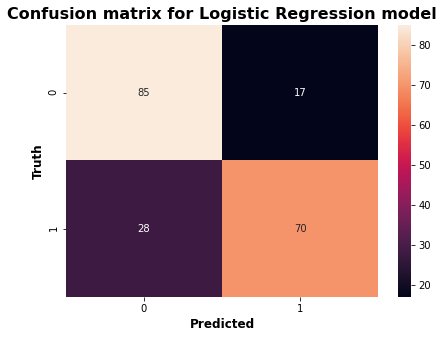

In [17]:
plt.figure(figsize = (7,5))
sn.heatmap(cm_LR, annot = True, fmt = 'd')
plt.title('Confusion matrix for Logistic Regression model', fontweight = 'bold', fontsize = 16)
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

### K-Fold Cross Validation

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Distinct accuracies for SVM :  [82.5  86.25 82.5  83.75 86.25 86.25 91.25 85.   83.75 85.  ]
Average Accuracy SVM : 85.25 %
Standard Deviation in SVM accuracies : 2.42 %


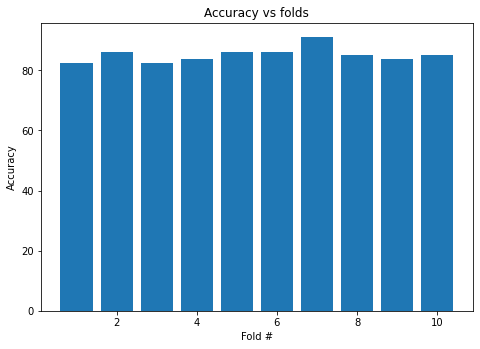

In [18]:
# For SVM
from sklearn.model_selection import cross_val_score
lr_accuracies = cross_val_score(estimator = LR_classifier, X = X_train, y = Y_train, cv = 10)
print("Distinct accuracies for SVM : ", lr_accuracies*100)
print("Average Accuracy SVM : {:.2f} %".format(lr_accuracies.mean()*100))
print("Standard Deviation in SVM accuracies : {:.2f} %".format(lr_accuracies.std()*100))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(1,len(lr_accuracies)+1), lr_accuracies*100)
plt.xlabel("Fold #")
plt.ylabel("Accuracy")
plt.title("Accuracy vs folds")
plt.show()

## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Hyper-parameter tuning


In [20]:
# Creating Parameter Space
# Creating a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
n_components = list(range(1,X_train.shape[1]+1,1))

# Creating lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = {'criterion' : criterion, 'max_depth' : max_depth}

grid_search = GridSearchCV(estimator = dt_classifier, param_grid = parameters, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print("BEST Accuracy Random Forest : {:.2f} %".format(best_accuracy*100))
print("BEST params for Random Forest : ", best_params)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.4f (+/-%0.04f) for %r"% (mean*100, std*100*2, params))

BEST Accuracy Random Forest : 95.50 %
BEST params for Random Forest :  {'criterion': 'entropy', 'max_depth': 6}
94.2500 (+/-4.5000) for {'criterion': 'gini', 'max_depth': 2}
94.7500 (+/-4.9749) for {'criterion': 'gini', 'max_depth': 4}
94.3750 (+/-5.1539) for {'criterion': 'gini', 'max_depth': 6}
94.1250 (+/-5.0062) for {'criterion': 'gini', 'max_depth': 8}
94.1250 (+/-6.4275) for {'criterion': 'gini', 'max_depth': 10}
93.1250 (+/-5.6181) for {'criterion': 'gini', 'max_depth': 12}
94.2500 (+/-4.5000) for {'criterion': 'entropy', 'max_depth': 2}
94.8750 (+/-4.1003) for {'criterion': 'entropy', 'max_depth': 4}
95.5000 (+/-4.6368) for {'criterion': 'entropy', 'max_depth': 6}
95.0000 (+/-3.8730) for {'criterion': 'entropy', 'max_depth': 8}
94.3750 (+/-3.7500) for {'criterion': 'entropy', 'max_depth': 10}
93.7500 (+/-4.6098) for {'criterion': 'entropy', 'max_depth': 12}


In [21]:
y_pred_DT = dt_classifier.predict(X_test)

In [22]:
cm_DT = confusion_matrix(Y_test, y_pred_DT)
print(cm_DT)
print(accuracy_score(Y_test, y_pred_DT)*100, "% accuracy is achieved")

[[93  9]
 [17 81]]
87.0 % accuracy is achieved


Text(42.0, 0.5, 'Truth')

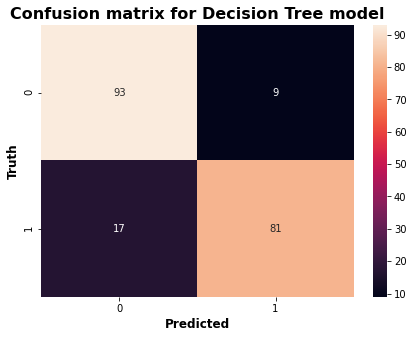

In [23]:
plt.figure(figsize = (7,5))
sn.heatmap(cm_DT, annot = True, fmt = 'd')
plt.title('Confusion matrix for Decision Tree model', fontweight = 'bold', fontsize = 16)
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

### K-Fold Cross Validation



Distinct accuracies for SVM :  [92.5  96.25 90.   95.   93.75 93.75 90.   95.   91.25 95.  ]
Average Accuracy SVM : 93.25 %
Standard Deviation in SVM accuracies : 2.11 %


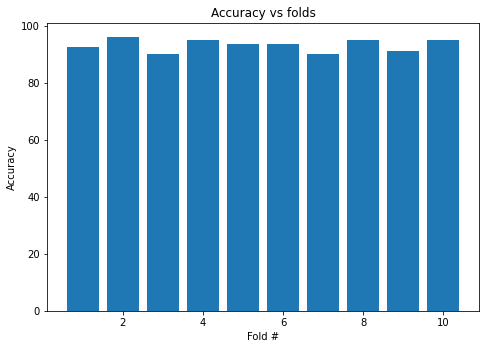

In [24]:
# For SVM
from sklearn.model_selection import cross_val_score
dt_accuracies = cross_val_score(estimator = dt_classifier, X = X_train, y = Y_train, cv = 10)
print("Distinct accuracies for SVM : ", dt_accuracies*100)
print("Average Accuracy SVM : {:.2f} %".format(dt_accuracies.mean()*100))
print("Standard Deviation in SVM accuracies : {:.2f} %".format(dt_accuracies.std()*100))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(1,len(dt_accuracies)+1), dt_accuracies*100)
plt.xlabel("Fold #")
plt.ylabel("Accuracy")
plt.title("Accuracy vs folds")
plt.show()

## Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
y_pred_NB = nb_classifier.predict(X_test)

In [27]:
cm_NB = confusion_matrix(Y_test, y_pred_NB)
print(cm_NB)
print(accuracy_score(Y_test, y_pred_NB),"% accuracy is achieved")

[[78 24]
 [18 80]]
0.79 % accuracy is achieved


Text(42.0, 0.5, 'Truth')

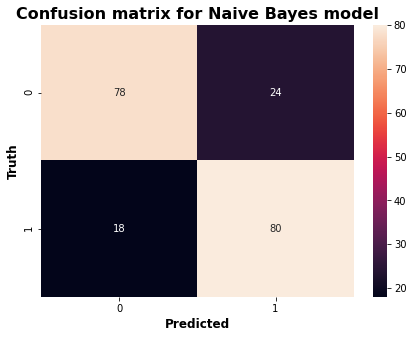

In [28]:
plt.figure(figsize = (7,5))
sn.heatmap(cm_NB, annot = True, fmt = 'd')
plt.title('Confusion matrix for Naive Bayes model', fontweight = 'bold', fontsize = 16)
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

### K-Fold Cross Validation

Distinct accuracies for NB :  [80.   85.   82.5  85.   82.5  90.   93.75 83.75 83.75 90.  ]
Average Accuracy NB : 85.62 %
Standard Deviation in NB accuracies : 4.04 %


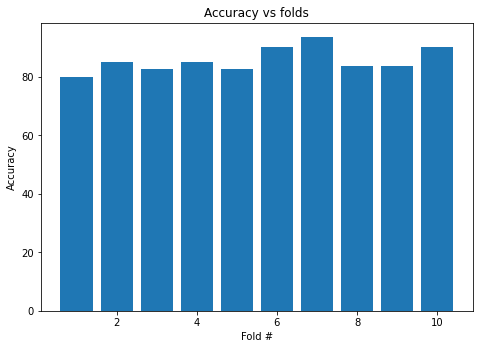

In [29]:
from sklearn.model_selection import cross_val_score
nb_accuracies = cross_val_score(estimator = nb_classifier, X = X_train, y = Y_train, cv = 10)
print("Distinct accuracies for NB : ", nb_accuracies*100)
print("Average Accuracy NB : {:.2f} %".format(nb_accuracies.mean()*100))
print("Standard Deviation in NB accuracies : {:.2f} %".format(nb_accuracies.std()*100))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(1,len(nb_accuracies)+1), nb_accuracies*100)
plt.xlabel("Fold #")
plt.ylabel("Accuracy")
plt.title("Accuracy vs folds")
plt.show()

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Hyper prameter tuning

In [31]:
parameters = {'max_depth': [10], 'n_estimators': [40, 50, 70, 80, 100, 120, 150, 170, 200]}

grid_search = GridSearchCV(estimator = rf_classifier, param_grid = parameters, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print("BEST Accuracy Random Forest : {:.2f} %".format(best_accuracy*100))
print("BEST params for Random Forest : ", best_params)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.4f (+/-%0.04f) for %r"% (mean*100, std*100*2, params))

BEST Accuracy Random Forest : 95.75 %
BEST params for Random Forest :  {'max_depth': 10, 'n_estimators': 50}
95.6250 (+/-4.2205) for {'max_depth': 10, 'n_estimators': 40}
95.7500 (+/-4.3589) for {'max_depth': 10, 'n_estimators': 50}
95.6250 (+/-4.0697) for {'max_depth': 10, 'n_estimators': 70}
95.6250 (+/-4.0697) for {'max_depth': 10, 'n_estimators': 80}
95.5000 (+/-3.9051) for {'max_depth': 10, 'n_estimators': 100}
95.6250 (+/-4.0697) for {'max_depth': 10, 'n_estimators': 120}
95.7500 (+/-4.3589) for {'max_depth': 10, 'n_estimators': 150}
95.7500 (+/-4.3589) for {'max_depth': 10, 'n_estimators': 170}
95.7500 (+/-4.3589) for {'max_depth': 10, 'n_estimators': 200}


In [32]:
y_pred_RF = rf_classifier.predict(X_test)

In [33]:
cm_RF = confusion_matrix(Y_test, y_pred_RF)
print(cm_RF)
accuracy_score(Y_test, y_pred_RF)

[[100   2]
 [ 17  81]]


0.905

Text(42.0, 0.5, 'Truth')

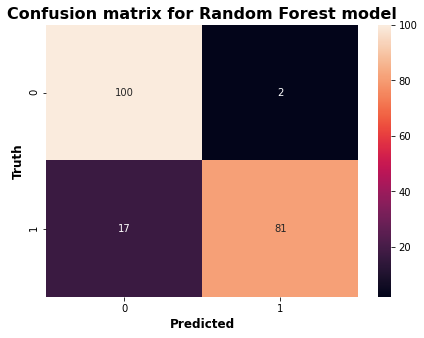

In [34]:
plt.figure(figsize = (7,5))
sn.heatmap(cm_RF, annot = True, fmt = 'd')
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.title('Confusion matrix for Random Forest model', fontweight = 'bold', fontsize = 16)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

### K-Fold Cross validatoin

Distinct accuracies for NB :  [95.   97.5  93.75 92.5  95.   96.25 93.75 98.75 93.75 95.  ]
Average Accuracy NB : 95.12 %
Standard Deviation in NB accuracies : 1.81 %


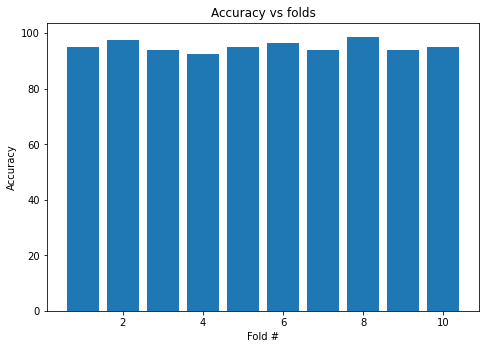

In [35]:
from sklearn.model_selection import cross_val_score
rf_accuracies = cross_val_score(estimator = rf_classifier, X = X_train, y = Y_train, cv = 10)
print("Distinct accuracies for NB : ", rf_accuracies*100)
print("Average Accuracy NB : {:.2f} %".format(rf_accuracies.mean()*100))
print("Standard Deviation in NB accuracies : {:.2f} %".format(rf_accuracies.std()*100))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(1,len(rf_accuracies)+1), rf_accuracies*100)
plt.xlabel("Fold #")
plt.ylabel("Accuracy")
plt.title("Accuracy vs folds")
plt.show()

## K-Nearest Neighbours

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

### Hyper parameter tuning

In [37]:
parameters = {'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'metric' : ['minkowski'], 'p' : [2]}

grid_search = GridSearchCV(estimator = knn_classifier, param_grid = parameters, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print("BEST Accuracy KNN : {:.2f} %".format(best_accuracy*100))
print("BEST params for KNN : ", best_params)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.4f (+/-%0.04f) for %r"% (mean*100, std*100*2, params))

BEST Accuracy KNN : 94.50 %
BEST params for KNN :  {'metric': 'minkowski', 'n_neighbors': 5, 'p': 2}
94.5000 (+/-5.3852) for {'metric': 'minkowski', 'n_neighbors': 5, 'p': 2}
94.3750 (+/-4.6435) for {'metric': 'minkowski', 'n_neighbors': 10, 'p': 2}
93.8750 (+/-5.4141) for {'metric': 'minkowski', 'n_neighbors': 15, 'p': 2}
93.2500 (+/-4.7697) for {'metric': 'minkowski', 'n_neighbors': 20, 'p': 2}
92.1250 (+/-3.7165) for {'metric': 'minkowski', 'n_neighbors': 25, 'p': 2}
91.7500 (+/-4.0620) for {'metric': 'minkowski', 'n_neighbors': 30, 'p': 2}
91.7500 (+/-4.0620) for {'metric': 'minkowski', 'n_neighbors': 35, 'p': 2}
91.6250 (+/-4.0389) for {'metric': 'minkowski', 'n_neighbors': 40, 'p': 2}
91.3750 (+/-4.3946) for {'metric': 'minkowski', 'n_neighbors': 45, 'p': 2}
91.2500 (+/-4.6098) for {'metric': 'minkowski', 'n_neighbors': 50, 'p': 2}


In [38]:
y_pred_KNN = knn_classifier.predict(X_test)

In [39]:
cm_KNN = confusion_matrix(Y_test, y_pred_KNN)
print(cm_KNN)
print(accuracy_score(Y_test, y_pred_KNN)*100, "% accuracy is achieved")

[[99  3]
 [19 79]]
89.0 % accuracy is achieved


Text(42.0, 0.5, 'Truth')

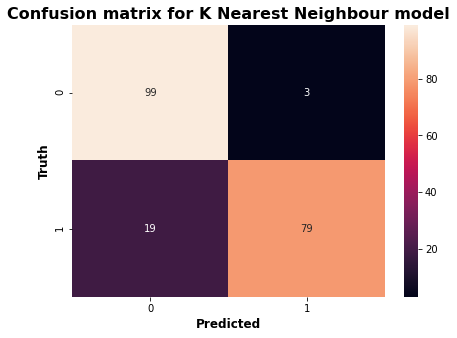

In [40]:
plt.figure(figsize = (7,5))
sn.heatmap(cm_KNN, annot = True, fmt = 'd')
plt.title('Confusion matrix for K Nearest Neighbour model', fontweight = 'bold', fontsize = 16)
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

### K-Fold Cross validation for KNN

Distinct accuracies for KNN :  [91.25 97.5  96.25 90.   92.5  95.   93.75 96.25 95.   96.25]
Average Accuracy KNN : 94.38 %
Standard Deviation in KNN accuracies : 2.32 %


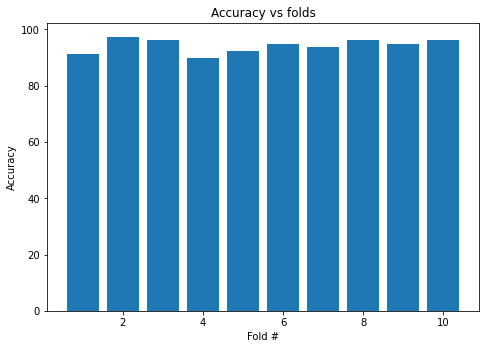

In [41]:
from sklearn.model_selection import cross_val_score
knn_accuracies = cross_val_score(estimator = knn_classifier, X = X_train, y = Y_train, cv = 10)
print("Distinct accuracies for KNN : ", knn_accuracies*100)
print("Average Accuracy KNN : {:.2f} %".format(knn_accuracies.mean()*100))
print("Standard Deviation in KNN accuracies : {:.2f} %".format(knn_accuracies.std()*100))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(1,len(knn_accuracies)+1), knn_accuracies*100)
plt.xlabel("Fold #")
plt.ylabel("Accuracy")
plt.title("Accuracy vs folds")
plt.show()